In [1]:
# needed libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

from pandas.plotting import parallel_coordinates

In [2]:
# outputs the value for every decision variable and output variable 
opt_results = pd.read_csv("../outputs/baseline_results.csv").drop(columns="Unnamed: 0")
opt_results

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v160,v161,v162,v163,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro
0,0.052364,0.087187,0.407242,0.107700,0.802398,0.038154,0.072404,0.332198,0.704173,0.159662,...,0.085100,0.317028,0.341144,0.537682,17.698853,4.438602,0.000000,0.085951,0.000000,14.952997
1,0.829700,0.753010,0.592823,0.324864,-0.834459,0.668745,0.918451,0.179797,-0.747706,0.475164,...,0.817174,0.434027,0.534799,0.365128,10.580375,3.075155,0.000000,0.124118,0.000000,9.424000
2,0.010756,0.440681,0.422296,0.396697,0.670044,0.932155,0.277200,0.159139,-0.706814,0.829693,...,0.091582,0.097262,0.696940,0.235680,13.779335,5.029973,0.937500,0.518966,0.000000,15.038974
3,0.541860,0.396247,0.925007,0.343662,0.370406,0.884527,-0.608081,0.591043,0.256399,0.102089,...,0.742305,0.360149,0.703112,0.171133,7.608407,2.418017,0.054167,0.124118,0.000000,9.712743
4,0.116220,0.049560,0.403918,0.936500,-0.336882,0.079613,0.356663,0.851887,-0.327033,0.231855,...,0.406881,0.464098,0.399894,0.475845,13.026376,4.285742,0.954167,0.000000,0.000000,11.903136
5,0.083321,0.435864,0.086803,0.289718,-0.046804,0.206364,-0.116149,0.584802,-0.095820,0.137916,...,0.446627,0.364745,0.619185,0.640859,13.856823,3.732484,0.000000,0.000000,0.000000,14.756991
6,0.011414,0.887590,0.234652,0.222793,-0.790928,0.452266,-0.343934,0.226575,0.451220,0.064276,...,0.360301,0.073323,0.484241,0.791037,17.502397,4.559880,0.000000,0.624280,0.132597,15.056721
7,0.190388,0.003307,0.300802,0.320025,-0.508660,0.063393,-0.267097,0.699670,-0.850204,0.522512,...,0.836771,0.851467,0.259093,0.438976,10.698161,3.037669,0.000000,0.066364,0.000000,11.834084
8,0.151387,0.125475,0.125361,0.059499,0.036707,0.705182,0.524686,0.347013,0.450511,0.836309,...,0.657977,0.930877,0.992722,0.900361,13.804711,3.475677,0.000000,0.000000,0.000000,12.498930
9,0.050836,0.009582,0.475697,0.143207,0.968958,0.140616,-0.708892,0.711276,-0.351260,0.229602,...,0.540586,0.803061,0.112371,0.928926,16.638679,4.308194,0.000000,1.017431,0.474400,14.846343


In [3]:
# splitting the policy and objective dataframe
policies, objectives = opt_results.iloc[:, :-6], opt_results.iloc[:, -6:]

In [4]:
# the policy dataframe with the values for the decision variables 
policies

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v154,v155,v156,v157,v158,v159,v160,v161,v162,v163
0,0.052364,0.087187,0.407242,0.107700,0.802398,0.038154,0.072404,0.332198,0.704173,0.159662,...,-0.605810,0.199499,0.990530,0.890809,-0.611673,0.564624,0.085100,0.317028,0.341144,0.537682
1,0.829700,0.753010,0.592823,0.324864,-0.834459,0.668745,0.918451,0.179797,-0.747706,0.475164,...,0.099759,0.897514,-0.874538,0.578290,-0.620361,0.569344,0.817174,0.434027,0.534799,0.365128
2,0.010756,0.440681,0.422296,0.396697,0.670044,0.932155,0.277200,0.159139,-0.706814,0.829693,...,0.177416,0.821190,0.651199,0.140704,0.725865,0.153819,0.091582,0.097262,0.696940,0.235680
3,0.541860,0.396247,0.925007,0.343662,0.370406,0.884527,-0.608081,0.591043,0.256399,0.102089,...,-0.490172,0.003347,0.633090,0.911865,0.661108,0.860508,0.742305,0.360149,0.703112,0.171133
4,0.116220,0.049560,0.403918,0.936500,-0.336882,0.079613,0.356663,0.851887,-0.327033,0.231855,...,0.465533,0.606258,0.416133,0.400753,-0.631443,0.566948,0.406881,0.464098,0.399894,0.475845
5,0.083321,0.435864,0.086803,0.289718,-0.046804,0.206364,-0.116149,0.584802,-0.095820,0.137916,...,0.039033,0.589360,0.909276,0.784795,-0.729823,0.030700,0.446627,0.364745,0.619185,0.640859
6,0.011414,0.887590,0.234652,0.222793,-0.790928,0.452266,-0.343934,0.226575,0.451220,0.064276,...,0.145050,0.826504,0.017215,0.535220,-0.564929,0.375016,0.360301,0.073323,0.484241,0.791037
7,0.190388,0.003307,0.300802,0.320025,-0.508660,0.063393,-0.267097,0.699670,-0.850204,0.522512,...,0.871897,0.987038,0.259260,0.360930,0.712620,0.330804,0.836771,0.851467,0.259093,0.438976
8,0.151387,0.125475,0.125361,0.059499,0.036707,0.705182,0.524686,0.347013,0.450511,0.836309,...,-0.675707,0.313723,0.775401,0.034733,0.894798,0.432333,0.657977,0.930877,0.992722,0.900361
9,0.050836,0.009582,0.475697,0.143207,0.968958,0.140616,-0.708892,0.711276,-0.351260,0.229602,...,0.944236,0.355543,0.681203,0.177656,0.291784,0.661336,0.540586,0.803061,0.112371,0.928926


In [5]:
# the objectives dataframe 
df_objectives = objectives.copy()
df_objectives

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro
0,17.698853,4.438602,0.000000,0.085951,0.000000,14.952997
1,10.580375,3.075155,0.000000,0.124118,0.000000,9.424000
2,13.779335,5.029973,0.937500,0.518966,0.000000,15.038974
3,7.608407,2.418017,0.054167,0.124118,0.000000,9.712743
4,13.026376,4.285742,0.954167,0.000000,0.000000,11.903136
5,13.856823,3.732484,0.000000,0.000000,0.000000,14.756991
6,17.502397,4.559880,0.000000,0.624280,0.132597,15.056721
7,10.698161,3.037669,0.000000,0.066364,0.000000,11.834084
8,13.804711,3.475677,0.000000,0.000000,0.000000,12.498930
9,16.638679,4.308194,0.000000,1.017431,0.474400,14.846343


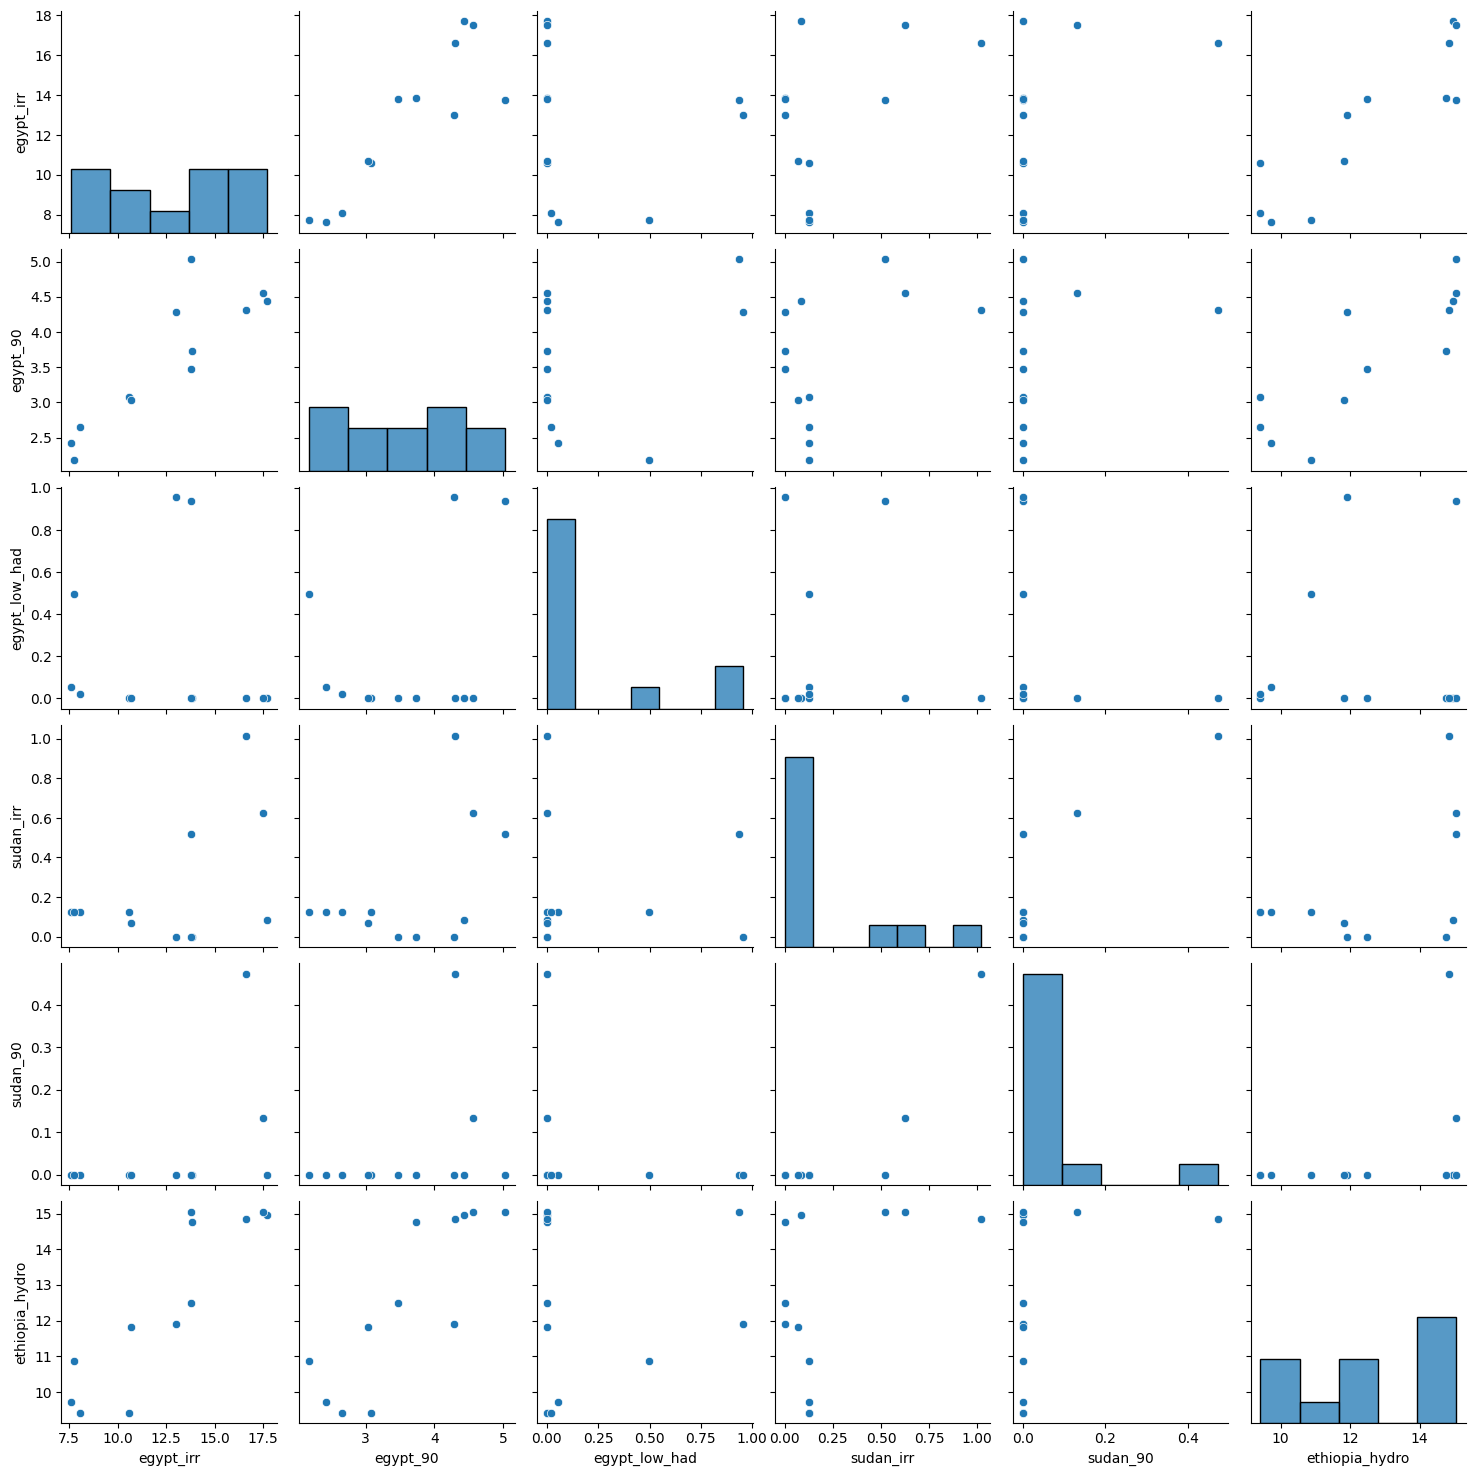

In [6]:
# a pairplot showing the relationships between the objective variables 
sns.pairplot(objectives)

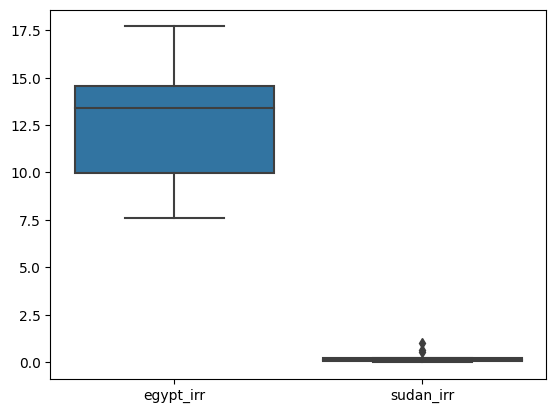

In [7]:
# Create the boxplot
sns.boxplot(data=df_objectives[['egypt_irr','sudan_irr']])

# Display the plot
plt.show()

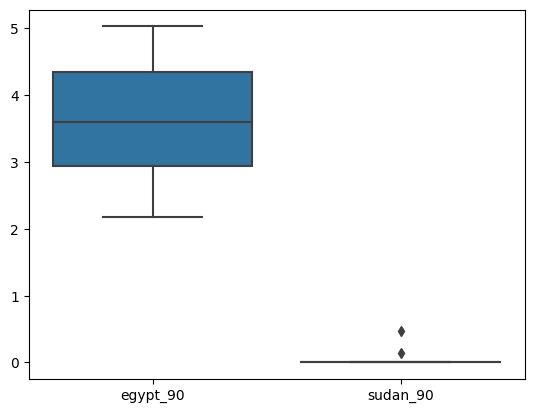

In [8]:
# Create the boxplot
sns.boxplot(data=df_objectives[['egypt_90','sudan_90']])

# Display the plot
plt.show()

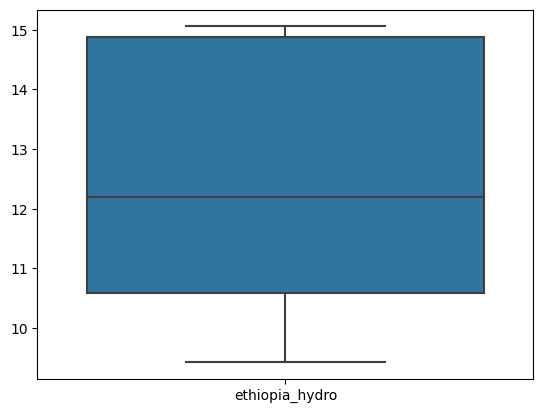

In [9]:
# Create the boxplot
sns.boxplot(data=df_objectives[['ethiopia_hydro']])

# Display the plot
plt.show()

In [10]:
# a list of the objective names 
obj = list(objectives.columns)
obj

['egypt_irr',
 'egypt_90',
 'egypt_low_had',
 'sudan_irr',
 'sudan_90',
 'ethiopia_hydro']

In [11]:
def get_best_solutions(dataframe, objective_directions):
    """
    Get the index of the best performing solution for each objective based on the specified objective directions.

    Args:
        dataframe (pd.DataFrame): The input DataFrame containing the objective values.
        objective_directions (dict): A dictionary mapping each objective column name to its direction ('min' or 'max').

    Returns:
        dict: A dictionary mapping each objective column name to the index of the best performing solution.

    """
    if not set(objective_directions.values()).issubset({'min', 'max'}):
        raise ValueError("Invalid objective direction. Must be 'min' or 'max'.")

    best_solutions = {}

    for column, direction in objective_directions.items():
        if direction == 'max':
            best_index = dataframe[column].idxmax()
        elif direction == 'min':
            best_index = dataframe[column].idxmin()

        best_solutions[column] = best_index

    return best_solutions

In [12]:
# the direction at which the objectives are optimized are put in a dictionary
directions = {'egypt_irr': 'min', 'egypt_90': 'min', 'egypt_low_had': 'min', 'sudan_irr': 'min', 'sudan_90': 'min',
       'ethiopia_hydro': 'max'}

In [13]:
best_solutions = get_best_solutions(df_objectives, directions)

In [14]:
# to create the parallel coordinates plot later, every solution is classified 
df_objectives['Class'] = 'general'

for column, best_index in best_solutions.items():
    df_objectives.at[best_index, 'Class'] = 'best_' + str(column)
df_objectives

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,Class
0,17.698853,4.438602,0.000000,0.085951,0.000000,14.952997,best_sudan_90
1,10.580375,3.075155,0.000000,0.124118,0.000000,9.424000,general
2,13.779335,5.029973,0.937500,0.518966,0.000000,15.038974,general
3,7.608407,2.418017,0.054167,0.124118,0.000000,9.712743,best_egypt_irr
4,13.026376,4.285742,0.954167,0.000000,0.000000,11.903136,best_sudan_irr
5,13.856823,3.732484,0.000000,0.000000,0.000000,14.756991,general
6,17.502397,4.559880,0.000000,0.624280,0.132597,15.056721,best_ethiopia_hydro
7,10.698161,3.037669,0.000000,0.066364,0.000000,11.834084,general
8,13.804711,3.475677,0.000000,0.000000,0.000000,12.498930,general
9,16.638679,4.308194,0.000000,1.017431,0.474400,14.846343,general


In [15]:
def plot_parallel_coordinates(dataframe, class_column, xlabel, ylabel, title):
    """
    Plot a parallel coordinates plot of the normalized objective values for every solution.

    Args:
        dataframe (pd.DataFrame): The input DataFrame containing the normalized objective values.
        class_column (str): The name of the column representing the class or groupings.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
        title (str): The title for the plot.

    Returns:
        None

    """
    plt.figure(figsize=(10, 6))

    # Create the parallel coordinates plot
    parallel_coordinates(dataframe, class_column, color=('tab:blue', 'tab:grey', 'tab:orange', 'tab:green', 'tab:purple', 'tab:brown', 'tab:cyan'))

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()

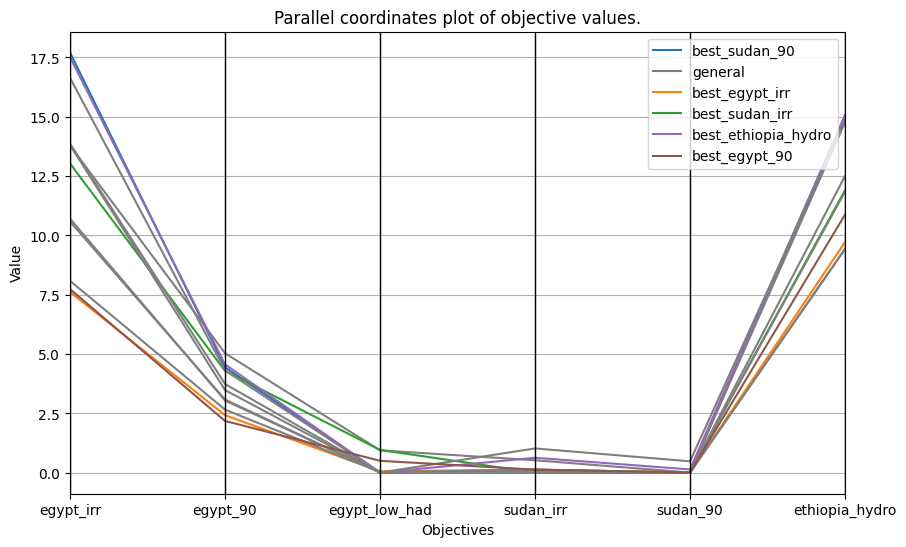

In [16]:
# a parallel coordinates plot of the objective values for every solution 
plot_parallel_coordinates(df_objectives, 'Class', 'Objectives', 'Value', 'Parallel coordinates plot of objective values.')

In [17]:
def normalize_dataframe(df: pd.DataFrame, objective_directions: dict, inplace: bool = False):
    """
    Normalize the specified columns of a DataFrame based on objective directions.

    Args:
        df (pd.DataFrame): The input DataFrame to be normalized.
        objective_directions (dict): A dictionary specifying the objective direction for each column.
            Keys should be column names, and values should be either 'min' or 'max'.
        inplace (bool, optional): Flag indicating whether to modify the DataFrame in-place or return a copy.
            Defaults to False.

    Returns:
        pd.DataFrame: The normalized DataFrame.

    Raises:
        ValueError: If an invalid objective direction is specified.

    """
    if not set(objective_directions.values()).issubset({'min', 'max'}):
        raise ValueError("Invalid objective direction. Must be 'min' or 'max'.")

    normalized_df = df.copy() if not inplace else df

    for column in df.columns:
        if column in objective_directions:
            direction = objective_directions[column]
            values = df[column]

            if direction == 'max':
                normalized_values = (values - values.min()) / (values.max() - values.min())
            else:  # direction == 'min'
                normalized_values = (values.max() - values) / (values.max() - values.min())

            normalized_df[column] = normalized_values

    return normalized_df


In [18]:
# the objectives dataframe is normalized
df_obj_norm = normalize_dataframe(df_objectives, directions)
df_obj_norm

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,Class
0,0.000000,0.207157,1.000000,0.915521,1.000000,0.981585,best_sudan_90
1,0.705467,0.684771,1.000000,0.878009,1.000000,0.000000,general
2,0.388439,0.000000,0.017467,0.489926,1.000000,0.996849,general
3,1.000000,0.914966,0.943231,0.878009,1.000000,0.051262,best_egypt_irr
4,0.463059,0.260703,0.000000,1.000000,1.000000,0.440131,best_sudan_irr
5,0.380759,0.454509,1.000000,1.000000,1.000000,0.946788,general
6,0.019469,0.164673,1.000000,0.386415,0.720496,1.000000,best_ethiopia_hydro
7,0.693794,0.697902,1.000000,0.934773,1.000000,0.427872,general
8,0.385924,0.544469,1.000000,1.000000,1.000000,0.545905,general
9,0.105067,0.252838,1.000000,0.000000,0.000000,0.962651,general


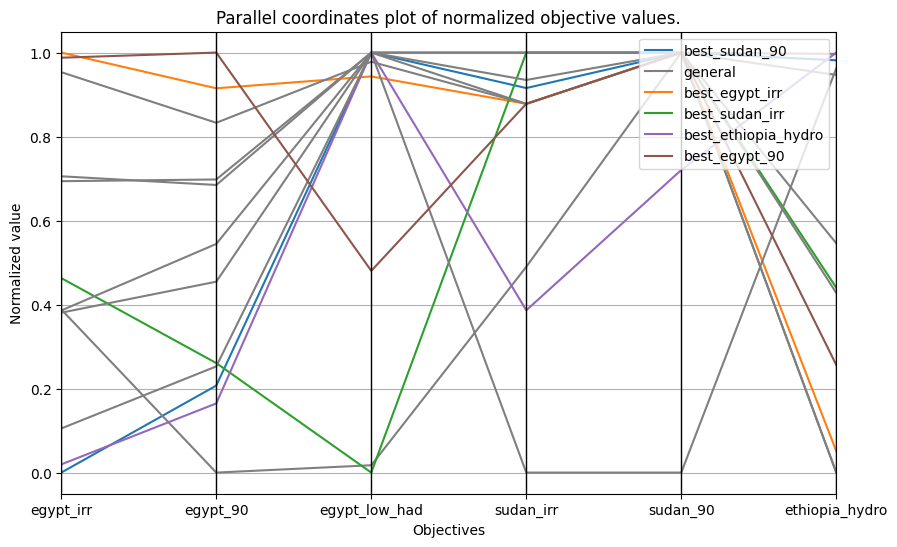

In [19]:
# a parallel coordinates plot of the normalized objective values for every solution
plot_parallel_coordinates(df_obj_norm, 'Class', 'Objectives', 'Normalized value', 'Parallel coordinates plot of normalized objective values.')

In [20]:
def calculate_coefficient_of_variation(dataframe: pd.DataFrame, columns: list):
    """
    Calculate the coefficient of variation for selected columns in the input DataFrame and return a new DataFrame.

    The coefficient of variation (CV) measures the relative variability of a dataset, defined as the ratio
    of the standard deviation to the mean. It provides a standardized measure of dispersion.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        columns (list): A list of column names for which to calculate the coefficient of variation.

    Returns:
        pd.DataFrame: A new DataFrame with the selected columns replaced by their respective coefficient of variation.

    """
    cov_dataframe = dataframe.copy()

    # Calculate the standard deviation for selected columns
    std_deviation = cov_dataframe[columns].std()

    # Calculate the mean for selected columns
    mean = cov_dataframe[columns].mean()

    # Calculate the coefficient of variation for selected columns
    cov_dataframe[columns] = (cov_dataframe[columns] - mean) / std_deviation

    return cov_dataframe


In [21]:
# the objectives dataframe with their values replaced by their coefficient of variation
df_obj_cov = calculate_coefficient_of_variation(df_objectives, obj)
df_obj_cov

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,Class
0,1.395958,0.899077,-0.549651,-0.466467,-0.364420,1.041205,best_sudan_90
1,-0.546748,-0.561111,-0.549651,-0.346313,-0.364420,-1.331146,general
2,0.326281,1.532407,1.961446,0.896739,-0.364420,1.078096,general
3,-1.357829,-1.264875,-0.404566,-0.346313,-0.364420,-1.207253,best_egypt_irr
4,0.120791,0.735371,2.006087,-0.737058,-0.364420,-0.267412,best_sudan_irr
5,0.347429,0.142857,-0.549651,-0.737058,-0.364420,0.957104,general
6,1.342344,1.028960,-0.549651,1.228289,0.590859,1.085710,best_ethiopia_hydro
7,-0.514603,-0.601256,-0.549651,-0.528134,-0.364420,-0.297040,general
8,0.333207,-0.132171,-0.549651,-0.737058,-0.364420,-0.011772,general
9,1.106626,0.759417,-0.549651,2.465999,3.053337,0.995443,general


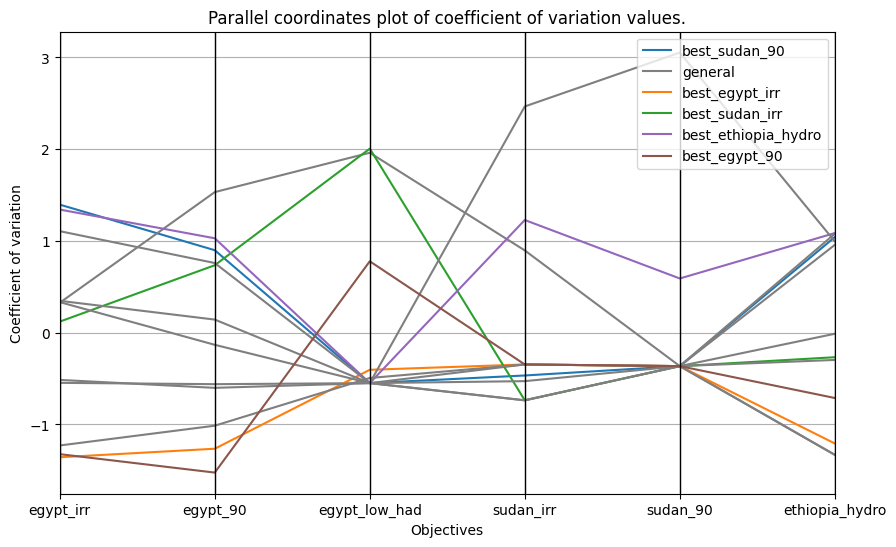

In [22]:
plot_parallel_coordinates(df_obj_cov, 'Class', 'Objectives', 'Coefficient of variation', 'Parallel coordinates plot of coefficient of variation values.')

### Calculating the Utilitarian Welfare Function

In [23]:
def calculate_utilitarian_welfare(refSet, columns):
    """
    Calculates the utilitarian welfare for each policy in the DataFrame.

    Args:
        refSet (pandas.DataFrame): Input DataFrame containing policy data.
        columns (list): List of column names to consider for calculating the utilitarian welfare.

    Returns:
        pandas.DataFrame: DataFrame with the utilitarian welfare scores for each policy.
    """
    uwf = refSet[columns].sum(axis=1)
    refSet['Utilitarian Welfare'] = uwf
    return refSet

### Calculating the SWF

In [24]:
def calculate_sufficitarian_welfare(refSet, columns, thresholds):
    """
    Calculates the sufficitarian welfare for each policy in the DataFrame.

    Args:
        refSet (pandas.DataFrame): Input DataFrame containing policy data.
        columns (list): List of column names to consider for calculating the sufficitarian welfare.
        thresholds (dict): Dictionary containing the threshold values for each column.

    Returns:
        pandas.DataFrame: DataFrame with the 'Sufficitarian Welfare' column added to the original reference set.
    """
    swf_scores = []

    for _, row in refSet.iterrows():
        swf_score = 0

        # Iterate over each column in the row
        for column in columns:
            value = row[column]
            threshold = thresholds[column]

            # Check if the value is smaller than the threshold
            if value < threshold:
                swf_score += value / threshold
            else:
                swf_score += 1

        swf_scores.append(swf_score)

    # Create a new DataFrame with the sufficitarian welfare scores
    swf_df = pd.DataFrame({'Sufficitarian Welfare': swf_scores})

    # Add the 'Sufficitarian Welfare' column to the original reference set
    refSet['Sufficitarian Welfare'] = swf_df['Sufficitarian Welfare']

    return refSet

### Calculating the PWF

In [ ]:
def calculate_pw(refSet, columns, origins, gamma):
    """
    Calculates the Prioritarian Welfare (PW) for each policy in a DataFrame and adds it as a new column.

    Args:
        refSet (pandas.DataFrame): Input DataFrame containing policy data.
        columns (list): List of column names to consider for calculating the Prioritarian Welfare.
        origins (dict): Dictionary containing the reference point for each column.
        gamma (float): The parameter that determines the degree of prioritarianism.

    Returns:
        pandas.DataFrame: DataFrame with the added Prioritarian Welfare column.
    """
    pw_scores = []

    for _, row in refSet.iterrows():
        pw_score = 0

        # Iterate over each column in the row
        for column in columns:
            u_ij = row[column]
            u_0j = origins[column]

            # Calculate the Prioritarian Welfare for the specific column and add it to the score
            if gamma != 1:
                pw_score += ((u_ij - u_0j) ** gamma - 1) / (1 - gamma)
            else:
                pw_score += np.log(u_ij - u_0j)

        pw_scores.append(pw_score)

    # Create a new DataFrame with the Prioritarian Welfare scores
    pw_df = pd.DataFrame({'Prioritarian Welfare': pw_scores})

    # Add the 'Prioritarian Welfare' column to the original reference set
    refSet['Prioritarian Welfare'] = pw_df['Prioritarian Welfare']

    return refSet

### Calculating the Gini Coefficient 

In [25]:
def calculate_gini_index(refSet, columns):
    """
    Calculates the Gini index of each policy in a DataFrame and adds it as a new column.

    Args:
        refSet (pandas.DataFrame): Input DataFrame containing policy data.
        columns (list): List of column names to consider for calculating the Gini index.

    Returns:
        pandas.DataFrame: DataFrame with the added Gini index column.
    """
    mean_x = refSet[columns].mean(axis=1)
    denominator = 2 * mean_x * len(columns)**2

    numerator = refSet[columns].sub(mean_x, axis='rows').abs().sum(axis=1)

    gini_index = numerator / denominator
    refSet['Gini Index'] = gini_index

    return refSet

### Show principle metrics

In [26]:
df_uwf = calculate_utilitarian_welfare(df_obj_norm, objectives.columns)
df_uwf

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,Class,Utilitarian Welfare
0,0.000000,0.207157,1.000000,0.915521,1.000000,0.981585,best_sudan_90,4.104263
1,0.705467,0.684771,1.000000,0.878009,1.000000,0.000000,general,4.268247
2,0.388439,0.000000,0.017467,0.489926,1.000000,0.996849,general,2.892681
3,1.000000,0.914966,0.943231,0.878009,1.000000,0.051262,best_egypt_irr,4.787468
4,0.463059,0.260703,0.000000,1.000000,1.000000,0.440131,best_sudan_irr,3.163894
5,0.380759,0.454509,1.000000,1.000000,1.000000,0.946788,general,4.782056
6,0.019469,0.164673,1.000000,0.386415,0.720496,1.000000,best_ethiopia_hydro,3.291053
7,0.693794,0.697902,1.000000,0.934773,1.000000,0.427872,general,4.754342
8,0.385924,0.544469,1.000000,1.000000,1.000000,0.545905,general,4.476297
9,0.105067,0.252838,1.000000,0.000000,0.000000,0.962651,general,2.320556


In [32]:
thresholds = {}
for column in objectives.columns:
    threshold = df_objectives[column].quantile(0.7)  # The threshold value for 70% quantile
    thresholds[column] = threshold
# thresholds['egypt_irr'] = ?
# thresholds['egypt_90'] = ?
# thresholds['egypt_low_had'] = ?
# thresholds['sudan_irr'] = ?
# thresholds['sudan_90'] = ?
# thresholds['ethiopia_hydro'] = ?
print(thresholds)

{'egypt_irr': 13.841189376735926, 'egypt_90': 4.301458718680818, 'egypt_low_had': 0.04416666666666659, 'sudan_irr': 0.1241177003225751, 'sudan_90': 0.0, 'ethiopia_hydro': 14.819537345220551}


In [35]:
df_swf = calculate_sufficitarian_welfare(df_objectives, objectives, thresholds)
df_swf

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,Class,Sufficitarian Welfare
0,17.698853,4.438602,0.000000,0.085951,0.000000,14.952997,best_sudan_90,4.692500
1,10.580375,3.075155,0.000000,0.124118,0.000000,9.424000,general,4.115239
2,13.779335,5.029973,0.937500,0.518966,0.000000,15.038974,general,5.995531
3,7.608407,2.418017,0.054167,0.124118,0.000000,9.712743,best_egypt_irr,4.767233
4,13.026376,4.285742,0.954167,0.000000,0.000000,11.903136,best_sudan_irr,4.740683
5,13.856823,3.732484,0.000000,0.000000,0.000000,14.756991,general,3.863505
6,17.502397,4.559880,0.000000,0.624280,0.132597,15.056721,best_ethiopia_hydro,5.000000
7,10.698161,3.037669,0.000000,0.066364,0.000000,11.834084,general,3.812346
8,13.804711,3.475677,0.000000,0.000000,0.000000,12.498930,general,3.648796
9,16.638679,4.308194,0.000000,1.017431,0.474400,14.846343,general,5.000000


In [34]:
df_uwf_gini = calculate_gini_index(df_uwf, objectives.columns)
df_uwf_gini

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,Class,Utilitarian Welfare,Gini Index
0,0.000000,0.207157,1.000000,0.915521,1.000000,0.981585,best_sudan_90,4.104263,0.302311
1,0.705467,0.684771,1.000000,0.878009,1.000000,0.000000,general,4.268247,0.238905
2,0.388439,0.000000,0.017467,0.489926,1.000000,0.996849,general,2.892681,0.463217
3,1.000000,0.914966,0.943231,0.878009,1.000000,0.051262,best_egypt_irr,4.787468,0.178867
4,0.463059,0.260703,0.000000,1.000000,1.000000,0.440131,best_sudan_irr,3.163894,0.381430
5,0.380759,0.454509,1.000000,1.000000,1.000000,0.946788,general,4.782056,0.166800
6,0.019469,0.164673,1.000000,0.386415,0.720496,1.000000,best_ethiopia_hydro,3.291053,0.392109
7,0.693794,0.697902,1.000000,0.934773,1.000000,0.427872,general,4.754342,0.140788
8,0.385924,0.544469,1.000000,1.000000,1.000000,0.545905,general,4.476297,0.182110
9,0.105067,0.252838,1.000000,0.000000,0.000000,0.962651,general,2.320556,0.577141


In [ ]:
# classify best gini
df_obj_gini.at[best_index_g, 'Class'] = 'best_gini' 
df_obj_gini

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,Class,Gini
0,0.000000,0.207157,1.000000,0.915521,1.000000,0.981585,best_sudan_90,0.629833
1,0.705467,0.684771,1.000000,0.878009,1.000000,0.000000,general,0.775143
2,0.388439,0.000000,0.017467,0.489926,1.000000,0.996849,general,0.261082
3,1.000000,0.914966,0.943231,0.878009,1.000000,0.051262,best_egypt_irr,0.912733
4,0.463059,0.260703,0.000000,1.000000,1.000000,0.440131,best_sudan_irr,0.448516
5,0.380759,0.454509,1.000000,1.000000,1.000000,0.946788,general,0.940387
6,0.019469,0.164673,1.000000,0.386415,0.720496,1.000000,best_ethiopia_hydro,0.424041
7,0.693794,0.697902,1.000000,0.934773,1.000000,0.427872,best_gini,1.000000
8,0.385924,0.544469,1.000000,1.000000,1.000000,0.545905,general,0.905302
9,0.105067,0.252838,1.000000,0.000000,0.000000,0.962651,general,0.000000


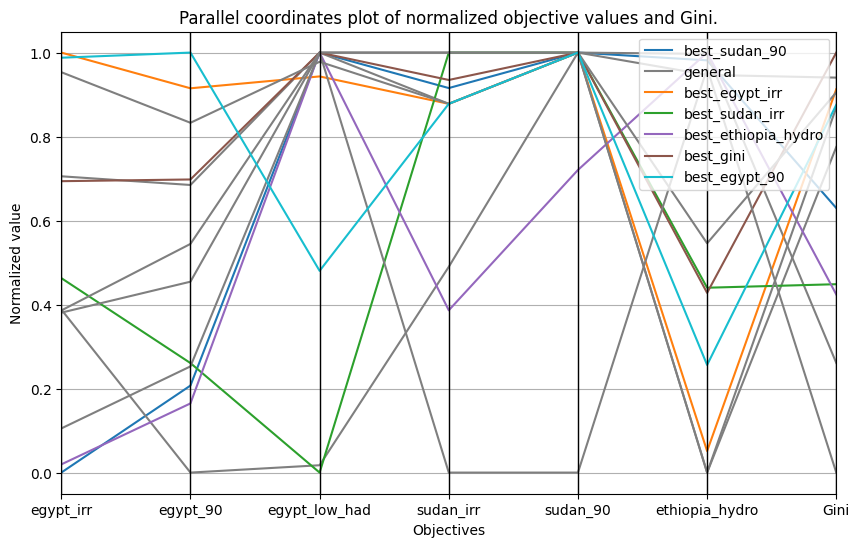

In [ ]:
plot_parallel_coordinates(df_obj_gini, 'Class', 'Objectives', 'Normalized value', 'Parallel coordinates plot of normalized objective values and Gini.')